# Homework 3

## Question 1

- Let $X_1$ be a positive valued random variable and let $X_2:=\frac{1}{X_1}$ and $X_3:=e^{-X_1}$.
- Clearly, $(X_1,X_2)$ and $(X_1,X_3)$ are countercomonotonic, while $(X_2,X_3)$ is comonotonic.
- Let $C$ be the copula of $(X_1,X_2,X_3)$.
- Answer the following questions:
    - Explain why $C$ is also the copula of $(X_1,-X_1,-X_1)$
    - Now show that $C(u_1,u_2,u_3)=\max\{\min\{u_2,u_3\}+u_1-1,0\}$

### Solution
- The reason why $C$ is also the copula of $(X_1,-X_1,-X_1)$ is that the components $(X_1,-X_1,-X_1)$ are monotonic transformations of $(X_1,X_2,X_3)$
- Equivalently, we need to find the copula for $(X_1,-X_1,-X_1)$. That is, denoting by $C_{1,2}$ the copula of $(X_1,-X_1)$, $C$ must satisfy
$$\begin{align*}
C(u_1,u_2,u_3) & = \mathbb{P}(X_1\leq u_1, -X_1\leq u_2, -X_1 \leq u_3)\\
& = \mathbb{P}(X_1\leq u_1, -X_1\leq \min\{u_2, u_3))\\
& = C_{1,2}(u_1,\min\{u_2,u_3\})
\end{align*}$$
- Since $(X_1,-X_1)$ are countercomonotonic, it must be the case that $C_{1,2}(u_1,u_2)=\max\{u_1+u_2-1,0\}$, which gives the result.

## Question 2

- Let $X_1$ and $X_2$ be two random variables such that $\log(X_1) \sim \mathcal{N}(0, 1)$ and $\log(X_2) \sim \mathcal{N}(0, \sigma^2)$ where $\sigma > 0$.
    - Explain why the log-normally-distributed random variables, $X_1$ and $X_2$, are not of the same type when $\sigma\neq 1$.
    - Let $\rho_{\min}$ and $\rho_{\max}$ be the minimum and maximum possible correlations, respectively, of $X_1$ and $X_2$. Explain why it must be the case that $\rho_{\min} > −1$ and $\rho_{\max} < 1$.
    - Let $Z \sim \mathcal{N}(0, 1)$ and show that if $(X_1, X_2) = (e^Z,e^{\sigma Z})$ then $X_1$ and $X_2$ are comonotonic. Similarly show that if $(X_1, X_2) = (e^Z,e^{−\sigma Z})$ then $X_1$ and $X_2$ are countermonotonic.
    - Now calculate $\rho_{\min}$ and $\rho_{\max}$ as a function of $\sigma$. Plot both of these quantities as a function of $\sigma$ in the interval $\sigma\in [.1, 5]$. What do you conclude?

### Solution

- This is true because the lognormal distribution is not close under affine transformations, and so $X_1$ and $X_2$ are of the same type if and only if $X_1=X_2$. Specifically, suppose there are $a>0$ and $b\in \mathbb{R}$ such that $X_1=aX_2+b$. Then, for every $u\in\mathbb{R}$
$$\begin{align*}
\Phi(u) & = \mathbb{P}(X_1\leq e^u)\\
& = \mathbb{P}(aX_2+b\leq e^u)\\
& = \mathbb{P}(\log(X_2)/\sigma\leq \log(e^u/a-b)/\sigma)\\
& = \Phi(\log(2^u/a-b)/\sigma)\\
\Longleftrightarrow u & = \log(e^u/a-b)/\sigma\\
\Longleftrightarrow \sigma & = 1, \ a=1, \ b=0.
\end{align*}$$
- $\rho_{\max}=1$ if and only if $X_1$ and $X_2$ are of the same type, and as shown above this is possible if and only if $X_1=X_2$. On the other hand, $\rho_{\min}=1$ if and only if $X_1$ and $-X_2$ are of the same type, but this is impossible, since both $X_1$ and $X_2$ are nonnegative.
- This follows from the fact that the copula of $(e^Z,e^{\sigma Z})$ is the same as that of $(Z,Z)$, which must then be the comonotonic copula. Similarly, the copula of $(e^Z,e^{-\sigma Z})$ is the same as that for $(Z,-Z)$, so it must be the countermonotonic copula.
- Using the formulas for mean and variance of a lognormal distribution, we easily obtain
$$\begin{align*}
\rho_{\max} & = \frac{Cov(e^{Z},e^{\sigma Z})}{\sqrt{V(e^Z)Ve^{\sigma Z}}}\\
& = \frac{\mathbb{E}[e^{(\sigma+1)Z}]-\mathbb{E}[e^{\sigma Z}]\mathbb{E}[e^{Z}]}{\sqrt{(e-1)e(e^{\sigma^2}-1)e^{\sigma^2}}}\\
& = \frac{e^{(\sigma+1)^2/2}-e^{\sigma^2/2}e^{1/2}}{\sqrt{(e-1)(e^{\sigma^2}-1)e^{\sigma^2+1}}}\\
& = \frac{e^{(\sigma^2+1)/2}(e^{\sigma}-1)}{\sqrt{(e-1)(e^{\sigma^2}-1)}e^{(\sigma^2+1)/2}}\\
& = \frac{e^{\sigma}-1}{\sqrt{(e-1)(e^{\sigma^2}-1)}}\\
\rho_{\min} & = \frac{Cov(e^{Z},e^{-\sigma Z})}{\sqrt{V(e^Z)Ve^{-\sigma Z}}}\\
& = \frac{e^{-\sigma}-1}{\sqrt{(e-1)(e^{\sigma^2}-1)}}
\end{align*}$$

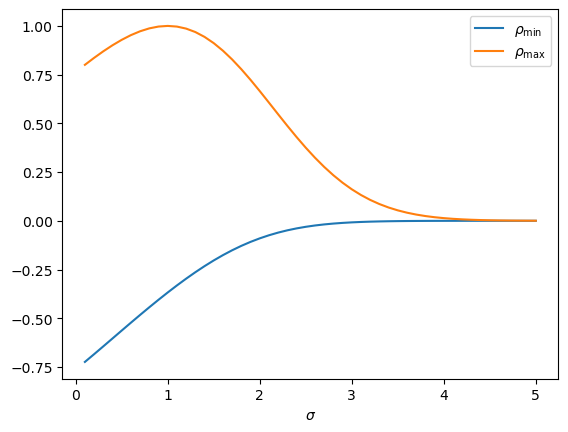

In [4]:
import numpy as np
import matplotlib.pyplot as plt

sig = np.linspace(0.1,5,50)
den = np.sqrt( (np.exp(1)-1) * (np.exp(sig**2)-1) )
rhomin = (np.exp(-sig)-1)/den
rhomax = (np.exp(sig)-1)/den

ax = plt.gca()  # or any other way to get an axis object
ax.plot(sig, rhomin, label=r'$\rho_{\min}$')
ax.plot(sig, rhomax, label=r'$\rho_{\max}$')
plt.xlabel(r'$\sigma$')
ax.legend()

- The plot above shows that, as expected, $\rho_{\max}$ is maximal for $\sigma=1$, and it is then decreasing to zero as $\sigma\rightarrow \infty$.
- Similarly, $\rho_{\min}$ is minimal as $\sigma\rightarrow 0$, and it is then increasing to zero as $\sigma\rightarrow \infty$.

## Question 3
